In [31]:
import pandas as pd

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
train = pd.read_csv('/content/drive/MyDrive/spaceship_titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/spaceship_titanic/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/spaceship_titanic/sample_submission.csv')

# Data Analysis

### Train data

In [34]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [35]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [36]:
train.info()
train.isnull().sum().sort_values(ascending = False)[0:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

### Test data

In [37]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [38]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [39]:
test.info()
test.isnull().sum().sort_values(ascending = False)[0:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

# Data Vizualization

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data = pd.concat([train, test], ignore_index=True)

In [42]:
unique_room_service_count = data['RoomService'].nunique()
print("Počet unikátních hodnot ve sloupci RoomService:", unique_room_service_count)


Počet unikátních hodnot ve sloupci RoomService: 1578


In [43]:
room_service_counts = train['RoomService'].value_counts()
print("Počet výskytů hodnoty 0 ve sloupci RoomService:", room_service_counts.get(0, 0))


Počet výskytů hodnoty 0 ve sloupci RoomService: 5577


In [44]:
room_service_values_first_100 = data['RoomService'].head(50)
print(room_service_values_first_100)



0        0.0
1      109.0
2       43.0
3        0.0
4      303.0
5        0.0
6       42.0
7        0.0
8        0.0
9        0.0
10       0.0
11      39.0
12      73.0
13     719.0
14       8.0
15      32.0
16    1286.0
17       0.0
18       0.0
19       0.0
20     412.0
21       0.0
22       0.0
23       0.0
24       0.0
25       NaN
26       0.0
27     980.0
28       0.0
29       0.0
30      22.0
31    1125.0
32       0.0
33     214.0
34       0.0
35       NaN
36       0.0
37     784.0
38       0.0
39     554.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46     970.0
47       0.0
48     790.0
49       0.0
Name: RoomService, dtype: float64


## Home planet

In [45]:
unique_values = data['HomePlanet'].value_counts().reset_index()
unique_values.columns = ['HomePlanet', 'Počet']
print(unique_values)


  HomePlanet  Počet
0      Earth   6865
1     Europa   3133
2       Mars   2684


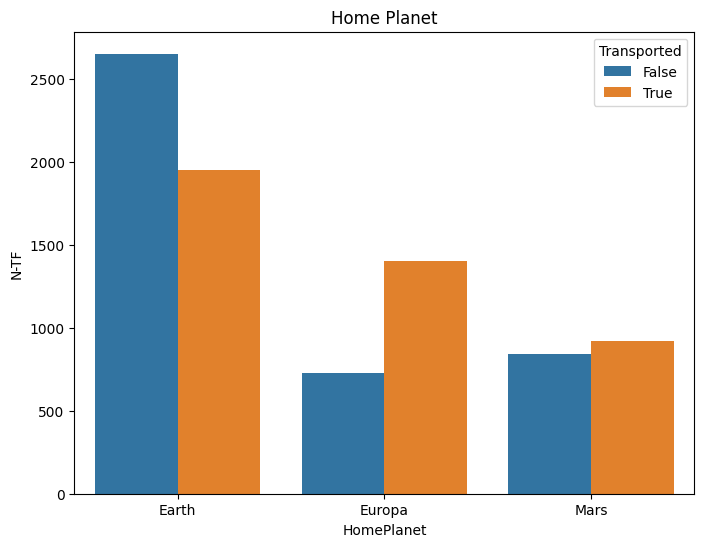

In [46]:
# Seskupení dat podle "HomePlanet" a "Transported" a spočítání počtu řádků v každé kombinaci
grouped_data = data.groupby(['HomePlanet', 'Transported']).size().reset_index (name='N-TF')

# Vytvoření sloupcového grafu
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=grouped_data, x='HomePlanet', y='N-TF', hue='Transported')

# Popisky os a titul grafu
plt.xlabel('HomePlanet')
plt.ylabel('N-TF')
plt.title('Home Planet')

# Zobrazení grafu
plt.show()

## Destination

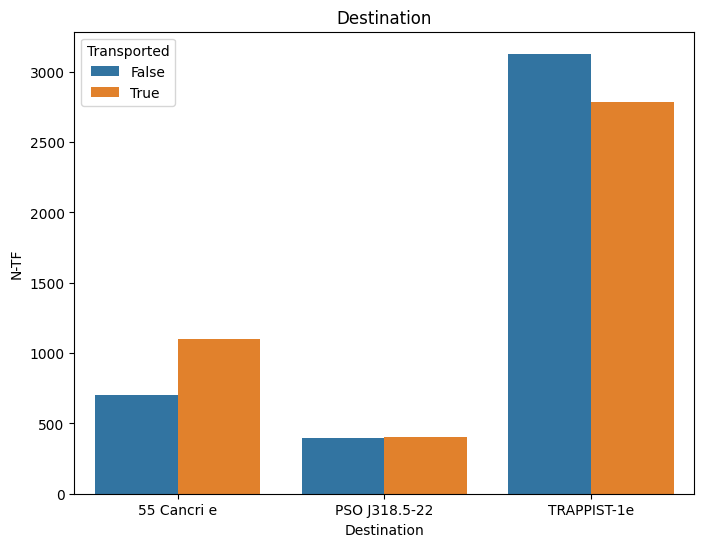

In [47]:
# Seskupení dat podle "HomePlanet" a "Transported" a spočítání počtu řádků v každé kombinaci
grouped_data = data.groupby(['Destination', 'Transported']).size().reset_index (name='N-TF')

# Vytvoření sloupcového grafu
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=grouped_data, x='Destination', y='N-TF', hue='Transported')

# Popisky os a titul grafu
plt.xlabel('Destination')
plt.ylabel('N-TF')
plt.title('Destination')

# Zobrazení grafu
plt.show()

## CryoSleep

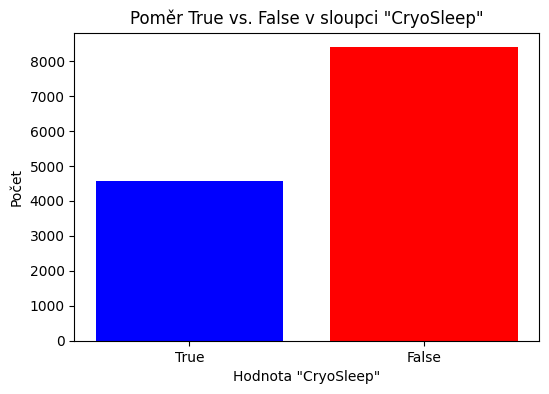

In [48]:
# Vypočet poměru True vs. False
true_count = data['CryoSleep'].sum()
false_count = len(data) - true_count
counts = [true_count, false_count]

# Názvy sloupců
categories = ['True', 'False']

# Vytvoření sloupcového grafu
plt.figure(figsize=(6, 4))
plt.bar(categories, counts, color=['blue', 'red'])
plt.xlabel('Hodnota "CryoSleep"')
plt.ylabel('Počet')
plt.title('Poměr True vs. False v sloupci "CryoSleep"')
plt.show()

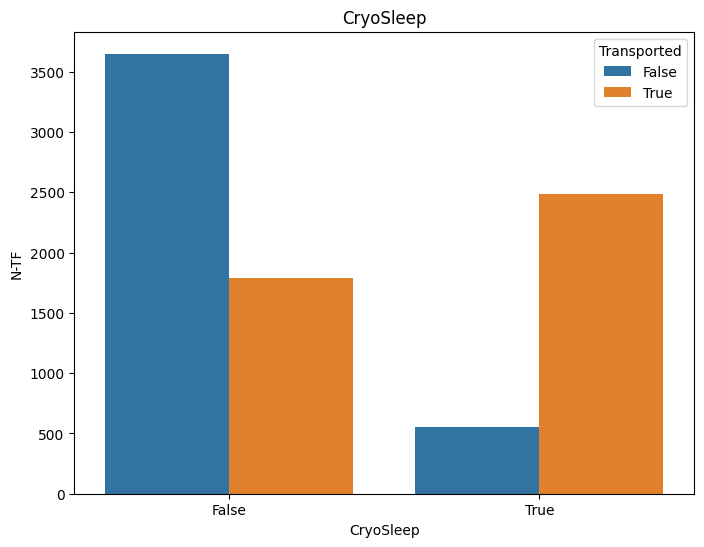

In [49]:
# Seskupení dat podle "HomePlanet" a "Transported" a spočítání počtu řádků v každé kombinaci
grouped_data = data.groupby(['CryoSleep', 'Transported']).size().reset_index (name='N-TF')

# Vytvoření sloupcového grafu
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=grouped_data, x='CryoSleep', y='N-TF', hue='Transported')

# Popisky os a titul grafu
plt.xlabel('CryoSleep')
plt.ylabel('N-TF')
plt.title('CryoSleep')

# Zobrazení grafu
plt.show()

## VIP

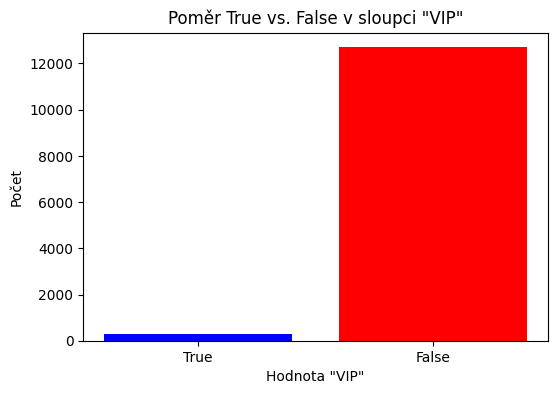

In [50]:
# Vypočet poměru True vs. False
true_count = data['VIP'].sum()
false_count = len(data) - true_count
counts = [true_count, false_count]

# Názvy sloupců
categories = ['True', 'False']

# Vytvoření sloupcového grafu
plt.figure(figsize=(6, 4))
plt.bar(categories, counts, color=['blue', 'red'])
plt.xlabel('Hodnota "VIP"')
plt.ylabel('Počet')
plt.title('Poměr True vs. False v sloupci "VIP"')
plt.show()

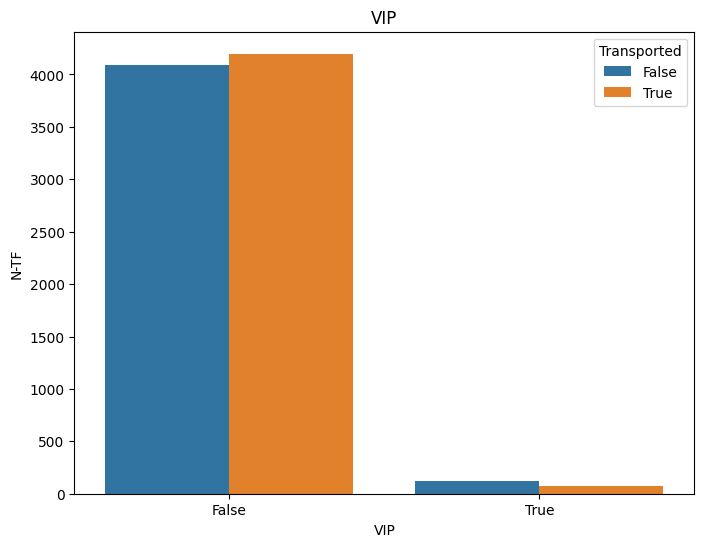

In [51]:
# Seskupení dat podle "HomePlanet" a "Transported" a spočítání počtu řádků v každé kombinaci
grouped_data = data.groupby(['VIP', 'Transported']).size().reset_index (name='N-TF')

# Vytvoření sloupcového grafu
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=grouped_data, x='VIP', y='N-TF', hue='Transported')

# Popisky os a titul grafu
plt.xlabel('VIP')
plt.ylabel('N-TF')
plt.title('VIP')

# Zobrazení grafu
plt.show()

## Cabin

In [52]:
'''
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Seskupení dat podle "Cabin" a spočítání počtu "True" hodnot v "Transported"
cabin_counts = data.groupby('Cabin')['Transported'].sum().reset_index()
cabin_counts.columns = ['Cabin', 'Transported']

# Připojení počtu "True" hodnot do datového rámce se všemi daty
df = data.merge(cabin_counts, on='Cabin', how='left')

# Vytvoření oblakového grafu s ohledem na počet "True" hodnot v "Transported"
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data.groupby('Cabin')['Transported'].mean())

# Zobrazení oblakového grafu
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Oblakový graf kabin s ohledem na Transported (True)')
plt.show()
'''

'\nfrom wordcloud import WordCloud\nimport matplotlib.pyplot as plt\nimport pandas as pd\n\n# Seskupení dat podle "Cabin" a spočítání počtu "True" hodnot v "Transported"\ncabin_counts = data.groupby(\'Cabin\')[\'Transported\'].sum().reset_index()\ncabin_counts.columns = [\'Cabin\', \'Transported\']\n\n# Připojení počtu "True" hodnot do datového rámce se všemi daty\ndf = data.merge(cabin_counts, on=\'Cabin\', how=\'left\')\n\n# Vytvoření oblakového grafu s ohledem na počet "True" hodnot v "Transported"\nwordcloud = WordCloud(width=800, height=400, background_color=\'white\').generate_from_frequencies(data.groupby(\'Cabin\')[\'Transported\'].mean())\n\n# Zobrazení oblakového grafu\nplt.figure(figsize=(10, 5))\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis(\'off\')\nplt.title(\'Oblakový graf kabin s ohledem na Transported (True)\')\nplt.show()\n'

##Age

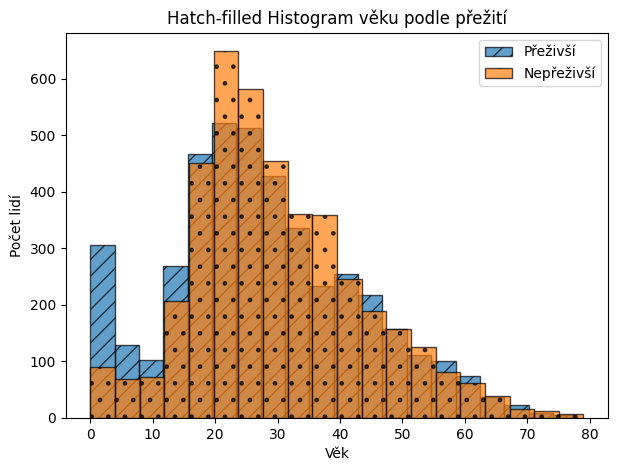

In [53]:
# Rozdělení dat na dvě skupiny: přeživší a nepřeživší
transported = data[data['Transported'] == 1]
not_transported = data[data['Transported'] == 0]

# Nastavení velikosti grafu
plt.figure(figsize=(7, 5))

# Vytvoření hatch-filled histogramu pro přeživší s křížovým vzorem
plt.hist(transported['Age'], bins=20, alpha=0.7, label='Přeživší', hatch='//', edgecolor='black')

# Vytvoření hatch-filled histogramu pro nepřeživší s tečkovaným vzorem
plt.hist(not_transported['Age'], bins=20, alpha=0.7, label='Nepřeživší', hatch='.', edgecolor='black')

# Popisky a popis os
plt.xlabel('Věk')
plt.ylabel('Počet lidí')
plt.title('Hatch-filled Histogram věku podle přežití')
plt.legend()

# Zobrazit graf
plt.show()


## Room Service

In [54]:
room_service_values_first_100 = data['RoomService'].head(50)
print(room_service_values_first_100)

0        0.0
1      109.0
2       43.0
3        0.0
4      303.0
5        0.0
6       42.0
7        0.0
8        0.0
9        0.0
10       0.0
11      39.0
12      73.0
13     719.0
14       8.0
15      32.0
16    1286.0
17       0.0
18       0.0
19       0.0
20     412.0
21       0.0
22       0.0
23       0.0
24       0.0
25       NaN
26       0.0
27     980.0
28       0.0
29       0.0
30      22.0
31    1125.0
32       0.0
33     214.0
34       0.0
35       NaN
36       0.0
37     784.0
38       0.0
39     554.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46     970.0
47       0.0
48     790.0
49       0.0
Name: RoomService, dtype: float64


# Preprocessing

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
import numpy as np

In [56]:
train = train.drop(["Name", "PassengerId"], axis=1)
test = test.drop(["Name", "PassengerId"], axis=1)

x = train.drop(["Transported"], axis=1)
y = train["Transported"]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6954, 11)
(1739, 11)
(6954,)
(1739,)


In [57]:
# Třída pro nahrazení kategorických chybějících hodnot nejčastější hodnotou
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_values = X.mode().iloc[0]
        return self

    def transform(self, X):
        return X.fillna(self.most_frequent_values)

# Pipeline pro kategorické sloupce
categorical_pipeline = Pipeline(steps=[
    ('imputer', MostFrequentImputer()),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline pro numerické sloupce
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

# Definice preprocesoru pro zpracování jednotlivých sloupců
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ],
    remainder='passthrough'
)


# Machine Learning

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

## Random Forest Classifier

In [59]:
# Define the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Create a pipeline
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', random_forest_model)
])

# Define hyperparameters for GridSearchCV for Random Forest
param_grid = {
    'clf__n_estimators': [100, 200, 400],
    'clf__max_depth': [30, 40, 50, 60],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Random Forest
random_forest_grid_search = GridSearchCV(estimator=random_forest_pipeline, param_grid=param_grid, cv=3, scoring='accuracy')

# Train the pipeline
random_forest_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck',
                                                                          'RoomService',
                                                                          'Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          MostFrequentImputer()),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HomePlanet',
                                                                          'CryoSleep',
                                                                          'Destination',
                                                                          'VIP',
                                                                          'Cabin'])])),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [30, 40, 50, 60],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 200, 400]},
             scoring='accuracy')

In [60]:
# Nejlepší kombinace hyperparametrů a přesnost
best_params = random_forest_grid_search.best_params_
best_accuracy = random_forest_grid_search.best_score_

# Výpis nejlepších parametrů a přesnosti
print("Nejlepší kombinace hyperparametrů:", best_params)
print("Nejlepší Accuracy (cross-validated accuracy):", best_accuracy)

Nejlepší kombinace hyperparametrů: {'clf__max_depth': 60, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 400}
Nejlepší Accuracy (cross-validated accuracy): 0.784728213977567


In [61]:
# Predikce na testovacích datech s nejlepšími parametry
y_pred_rf = random_forest_grid_search.predict(X_test)

# Výpočet metrik
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test,y_pred_rf)

# Výpis metrik
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.78
Precision: 0.80
Recall: 0.75
F1-Score: 0.77
Confusion Matrix:
[[697 164]
 [219 659]]


## XG Boost Classifier

In [64]:
import xgboost as xgb

In [65]:
# Define the XGBoost model
xgboost_model = xgb.XGBClassifier(random_state=42)

# Create a pipeline for XGBoost
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', xgboost_model)
])

# Define hyperparameters for GridSearchCV for XGBoost
xgboost_param_grid = {
    'clf__n_estimators': [100, 200, 300],  # Počet stromů v ensemble
    'clf__max_depth': [3, 4, 5, 6],  # Maximální hloubka stromů
    'clf__learning_rate': [0.01, 0.1, 0.2],  # Rychlost učení
    'clf__subsample': [0.8, 0.9, 1.0],  # Podmnožina tréninkových dat použitá v každém kroku
    'clf__colsample_bytree': [0.8, 0.9, 1.0],  # Podmnožina funkcí použitých v každém stromu
    'clf__eval_metric': ['logloss'],  # Metrika pro hodnocení
}

# Create a GridSearchCV object for XGBoost
xgboost_grid_search = GridSearchCV(estimator=xgboost_pipeline, param_grid=xgboost_param_grid, cv=3, scoring='accuracy')

# Train the XGBoost pipeline
xgboost_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck',
                                                                          'RoomService',
                                                                          'Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          MostFrequentImputer()),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='i...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'clf__colsample_bytree': [0.8, 0.9, 1.0],
                         'clf__eval_metric': ['logloss'],
                         'clf__learning_rate': [0.01, 0.1, 0.2],
                         'clf__max_depth': [3, 4, 5, 6],
                         'clf__n_estimators': [100, 200, 300],
                         'clf__subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [66]:
# Nejlepší kombinace hyperparametrů a přesnost
best_params = xgboost_grid_search.best_params_
best_accuracy = xgboost_grid_search.best_score_

# Výpis nejlepších parametrů a přesnosti
print("Nejlepší kombinace hyperparametrů:", best_params)
print("Nejlepší Accuracy (cross-validated accuracy):", best_accuracy)

Nejlepší kombinace hyperparametrů: {'clf__colsample_bytree': 0.8, 'clf__eval_metric': 'logloss', 'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__n_estimators': 100, 'clf__subsample': 1.0}
Nejlepší Accuracy (cross-validated accuracy): 0.7976704055220017


In [67]:
# Predikce na testovacích datech s nejlepšími parametry
y_pred_xgb = xgboost_grid_search.predict(X_test)

# Výpočet metrik
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Výpis metrik
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Matice záměn:")
print(conf_matrix)


Accuracy: 0.79
Precision: 0.76
Recall: 0.84
F1-Score: 0.80
Matice záměn:
[[627 234]
 [138 740]]


## Logistic regresion

In [68]:
# Define the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Create a pipeline for Logistic Regression
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', logistic_regression_model)
])

# Define hyperparameters for GridSearchCV for Logistic Regression
logistic_regression_param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear'],
    'clf__max_iter': [100, 500, 1000]
    # Other hyperparameters for the Logistic Regression model
}

# Create a GridSearchCV object for Logistic Regression
logistic_regression_grid_search = GridSearchCV(estimator=logistic_regression_pipeline, param_grid=logistic_regression_param_grid, cv=3, scoring='accuracy')

# Train the Logistic Regression pipeline
logistic_regression_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck',
                                                                          'RoomService',
                                                                          'Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          MostFrequentImputer()),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HomePlanet',
                                                                          'CryoSleep',
                                                                          'Destination',
                                                                          'VIP',
                                                                          'Cabin'])])),
                                       ('clf',
                                        LogisticRegression(random_state=42))]),
             param_grid={'clf__C': [0.1, 1, 10],
                         'clf__max_iter': [100, 500, 1000],
                         'clf__penalty': ['l1', 'l2'],
                         'clf__solver': ['liblinear']},
             scoring='accuracy')

In [69]:
# Predikce na testovacích datech s nejlepšími parametry
y_pred_lr = logistic_regression_grid_search.predict(X_test)

# Výpočet metrik
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Výpis metrik
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Matice záměn:")
print(conf_matrix)


Accuracy: 0.78
Precision: 0.76
Recall: 0.82
F1-Score: 0.79
Matice záměn:
[[639 222]
 [161 717]]


## Extra Tree Classifier

In [70]:
# Define the Random Decision tree
extra_tree_model = ExtraTreeClassifier(random_state=42)

# Create a pipeline
extra_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', extra_tree_model)
])

param_grid = {
    'clf__min_samples_split': [2, 5, 10, 20],
    'clf__max_depth': [None, 10, 15, 20, 30],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_features': [None, 'sqrt', 'log2', 0.5]
}

# Create a GridSearchCV object for Random Forest
extra_tree_grid_search = GridSearchCV(estimator=extra_tree_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the pipeline
extra_tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck',
                                                                          'RoomService',
                                                                          'Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          MostFrequentImputer()),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HomePlanet',
                                                                          'CryoSleep',
                                                                          'Destination',
                                                                          'VIP',
                                                                          'Cabin'])])),
                                       ('clf',
                                        ExtraTreeClassifier(random_state=42))]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [None, 10, 15, 20, 30],
                         'clf__max_features': [None, 'sqrt', 'log2', 0.5],
                         'clf__min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [71]:
# Predikce na testovacích datech s nejlepšími parametry
y_pred_et = extra_tree_grid_search.predict(X_test)

# Výpočet metrik
accuracy = accuracy_score(y_test, y_pred_et)
precision = precision_score(y_test, y_pred_et)
recall = recall_score(y_test, y_pred_et)
f1 = f1_score(y_test, y_pred_et)
conf_matrix = confusion_matrix(y_test, y_pred_et)

# Výpis metrik
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.77
Precision: 0.76
Recall: 0.80
F1-Score: 0.78
Confusion Matrix:
[[636 225]
 [176 702]]


## Ada Boost Classifier

In [72]:
# Define the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

# Create a pipeline for AdaBoost
adaboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', adaboost_model)
])

# Define hyperparameters for GridSearchCV for AdaBoost
adaboost_param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.01, 0.1, 1.0],
    'clf__algorithm': ['SAMME', 'SAMME.R'],
}

# Create a GridSearchCV object for AdaBoost
adaboost_grid_search = GridSearchCV(estimator=adaboost_pipeline, param_grid=adaboost_param_grid, cv=3, scoring='accuracy')

# Train the AdaBoost pipeline
adaboost_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck',
                                                                          'RoomService',
                                                                          'Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          MostFrequentImputer()),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HomePlanet',
                                                                          'CryoSleep',
                                                                          'Destination',
                                                                          'VIP',
                                                                          'Cabin'])])),
                                       ('clf',
                                        AdaBoostClassifier(random_state=42))]),
             param_grid={'clf__algorithm': ['SAMME', 'SAMME.R'],
                         'clf__learning_rate': [0.01, 0.1, 1.0],
                         'clf__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [73]:
# Nejlepší kombinace hyperparametrů a přesnost
best_params = adaboost_grid_search.best_params_
best_accuracy = adaboost_grid_search.best_score_

# Výpis nejlepších parametrů a přesnosti
print("Nejlepší kombinace hyperparametrů:", best_params)
print("Nejlepší Accuracy (cross-validated accuracy):", best_accuracy)

Nejlepší kombinace hyperparametrů: {'clf__algorithm': 'SAMME.R', 'clf__learning_rate': 1.0, 'clf__n_estimators': 100}
Nejlepší Accuracy (cross-validated accuracy): 0.7922059246476847


In [74]:
# Predikce na testovacích datech s nejlepšími parametry
y_pred_adaboost = adaboost_grid_search.predict(X_test)

# Výpočet metrik
accuracy = accuracy_score(y_test, y_pred_adaboost)
precision = precision_score(y_test, y_pred_adaboost)
recall = recall_score(y_test, y_pred_adaboost)
f1 = f1_score(y_test, y_pred_adaboost)
conf_matrix = confusion_matrix(y_test, y_pred_adaboost)

# Výpis metrik
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Matice záměn:")
print(conf_matrix)

Accuracy: 0.78
Precision: 0.76
Recall: 0.82
F1-Score: 0.79
Matice záměn:
[[635 226]
 [161 717]]


# Ensemble

In [75]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [76]:
best_random_forest_model = random_forest_grid_search.best_estimator_
best_xgboost_model = xgboost_grid_search.best_estimator_
best_logistic_regression_model = logistic_regression_grid_search.best_estimator_
best_extra_tree_model = extra_tree_grid_search.best_estimator_
best_adaboost_model = adaboost_grid_search.best_estimator_

In [77]:
# Define the VotingClassifier with the best models
voting_model = VotingClassifier(
    estimators=[
        ('RandomForest', best_random_forest_model),
        ('XGBoost', best_xgboost_model),
        ('LogisticRegression', best_logistic_regression_model),
        #('ExtraTreeClassifier', best_extra_tree_model),
        #('AdaBoost', best_adaboost_model)
    ],
    voting='hard'  # Use 'hard' voting for majority class label
)

# Fit the VotingClassifier
voting_model.fit(X_train, y_train)

# Predict on test data
y_pred_voting = voting_model.predict(X_test)

# Compute metrics for the VotingClassifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Print metrics for the VotingClassifier
print("Metrics for Voting model:")
print(f"Precision: {precision_voting:.2f}")
print(f"Recall: {recall_voting:.2f}")
print(f"F1-Score: {f1_voting:.2f}")
print(f"Accuracy: {accuracy_voting:.2f}")
print("Confusion Matrix:")
print(conf_matrix_voting)

Metrics for Voting model:
Precision: 0.77
Recall: 0.82
F1-Score: 0.79
Accuracy: 0.78
Confusion Matrix:
[[645 216]
 [160 718]]


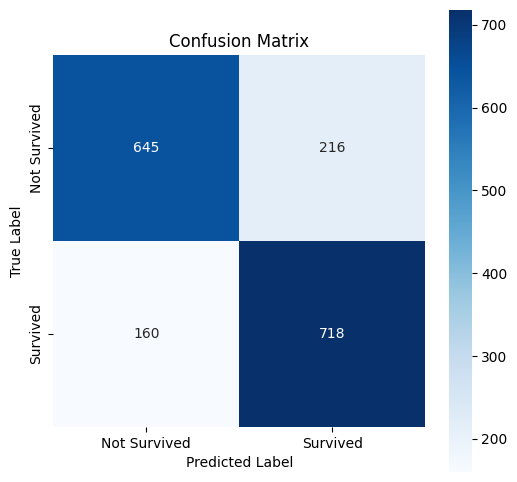

In [78]:
cm = confusion_matrix(y_test, y_pred_voting)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

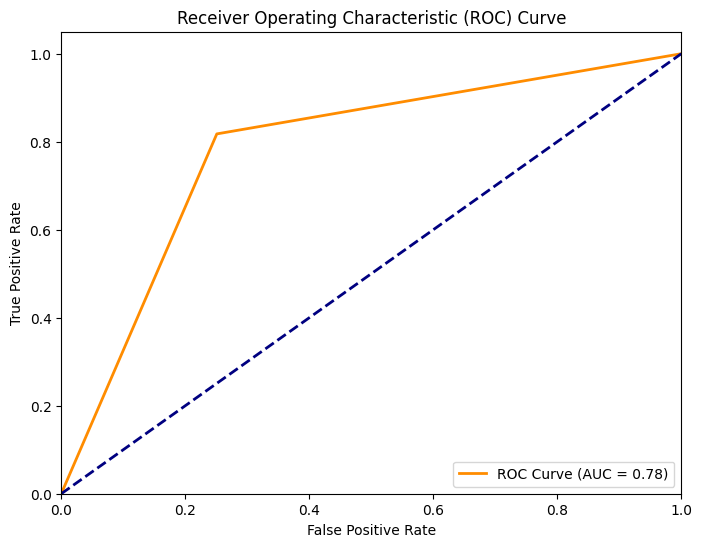

In [79]:
# Vytvoření ROC křivky
fpr, tpr, thresholds = roc_curve(y_test, y_pred_voting)
roc_auc = roc_auc_score(y_test, y_pred_voting)

# Vytvoření grafu ROC křivky
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Submission

In [80]:
y_pred_voting = voting_model.predict(test)

submission_df = pd.DataFrame({
    'PassengerId': sub['PassengerId'],
    'Transported': y_pred_voting
})

submission_df.to_csv('submission.csv', index=False)